In [1]:
import sys
sys.path.insert(0, "../torchdriveenv")

In [20]:
import torch
import numpy as np
from PIL import Image
from torch.utils.data import DataLoader

from datasets import TorchDriveEnvEpisodeDataset, DatasetMode

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
data_dir = "../torchdriveenv/examples/offline_datasets/episode_data_20241025-1300"

In [14]:
dataset = TorchDriveEnvEpisodeDataset(data_dir=data_dir, mode=DatasetMode.action_observation)

In [15]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [36]:
actions = torch.stack([item["action"] for item in dataset.data])
actions

tensor([[ 0.0180,  0.0178],
        [ 0.0226,  0.0174],
        [ 0.0206,  0.0171],
        ...,
        [-0.0200, -0.0000],
        [ 0.0200, -0.0662],
        [-0.0200, -0.0000]], device='cuda:0')

<Axes: >

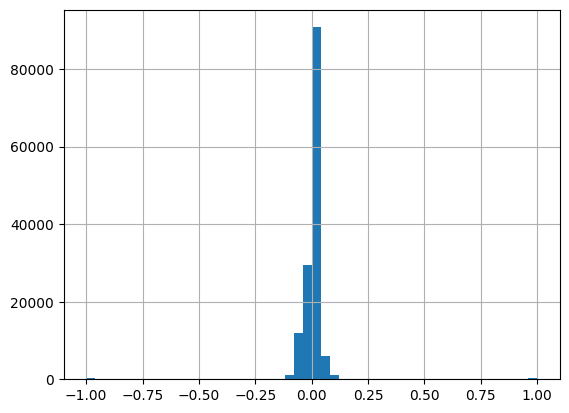

In [51]:
import pandas as pd

data = pd.Series(actions[:, 1].cpu().numpy())
data.hist(bins=50)

In [29]:
action, obs = next(iter(dataset))

In [30]:
obs.shape

(3, 64, 64)

tensor([0.0180, 0.0178], device='cuda:0')


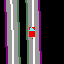

In [31]:
print(action)
Image.fromarray(obs.astype(np.uint8).transpose(1, 2, 0), 'RGB') 